In [2]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
# import networkx as nx
from rwtools.nemesis.latency_map.create_latency_map import *
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph


/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/samples_notebooks


In [3]:
import sys 
sys.executable

'/home/gilles/git-repos/NemesisRetroWrite/retrowrite/venv/bin/python'

In [4]:
from test_main import setup 

binary = os.path.abspath("./opt_code_v2/opt_code")
outputfile = "./opt_code_v2/opt_code.s"
loader, rw = setup(binary, outputfile)
rw.dump()

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
no latency information found for instruction: jle 
no latency information found for instruction: jge 
no latency information found for instruction: retq 
here


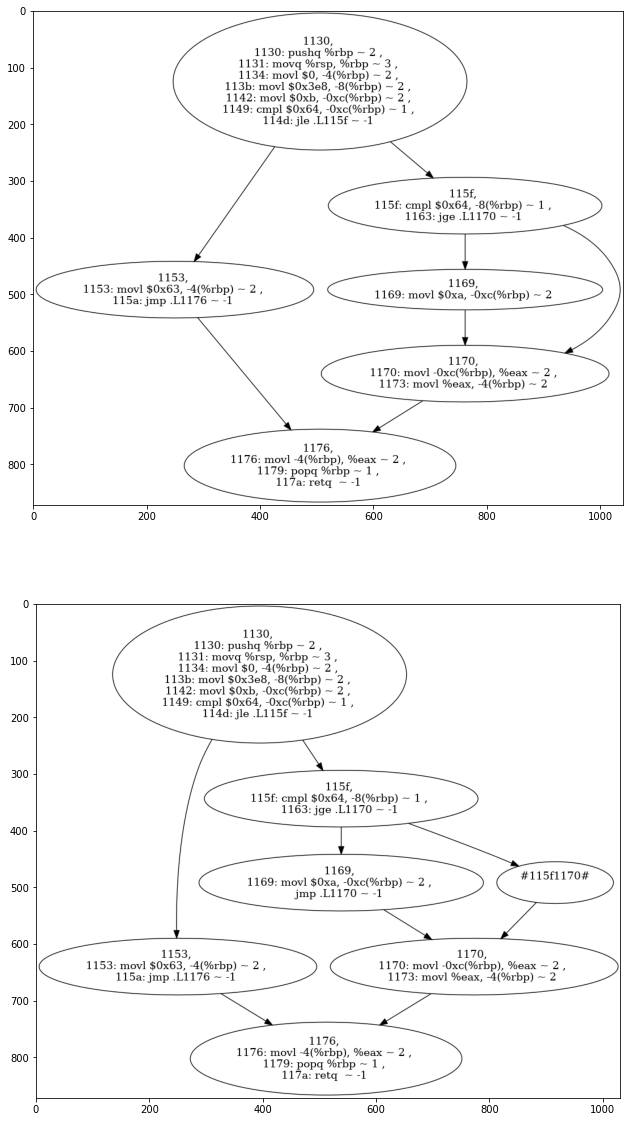

In [27]:
from rwtools.nemesis.nemesistool import NemesisInstrument
figs, axs = plt.subplots(2, figsize=(20,20))

binary = os.path.abspath("./opt_code_v2/opt_code")
outputfile = "./opt_code.s"

nemesis = NemesisInstrument(binary, outputfile)

axs[0].imshow(nemesis.render_cfg())


target_node = nemesis.cfg.get_node('115f')

nemesis.cfg.unwind_graph()

nemesis.cfg.insert_nodes(target_node)

# nemesis.instrument(target_node)
    
axs[1].imshow(nemesis.render_cfg())

# nemesis.dump()

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
no latency information found for instruction: endbr64 
no latency information found for instruction: jle 
no latency information found for instruction: retq 


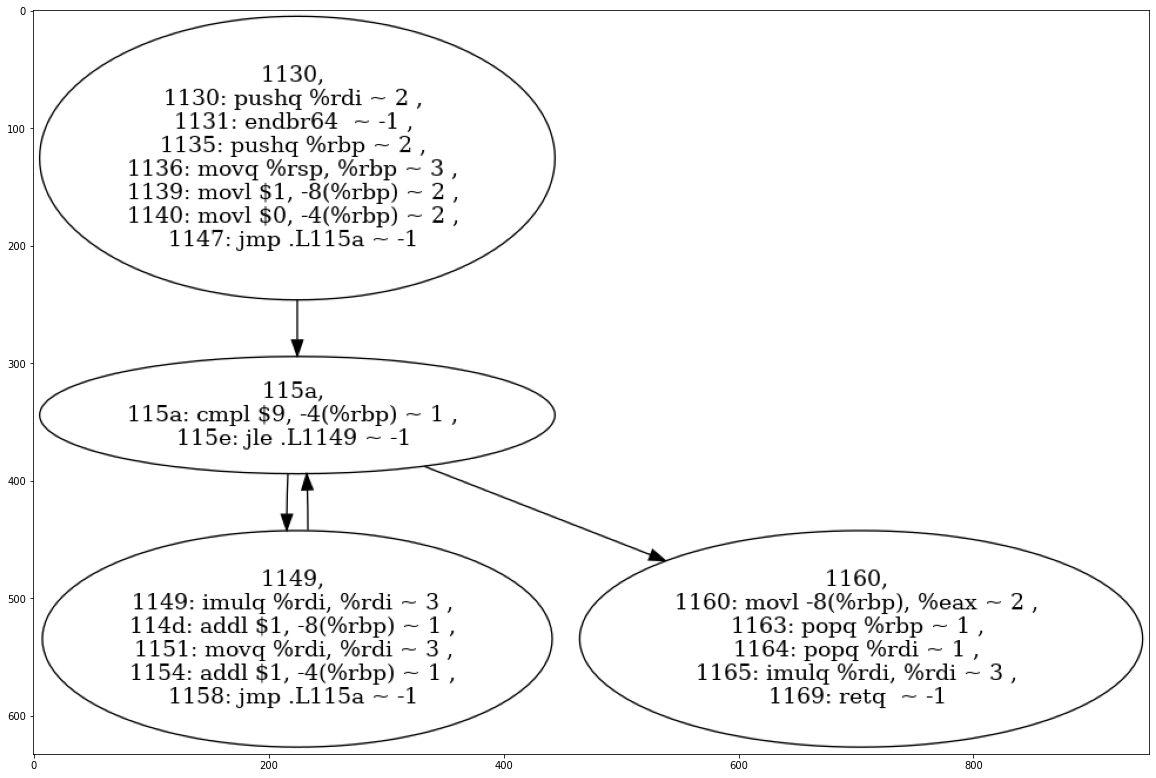

In [5]:
from rwtools.nemesis.nemesistool import NemesisInstrument
figs, axs = plt.subplots(1, figsize=(20,20))

binary = os.path.abspath("./a.out")
outputfile = "./opt_code.s"

nemesis = NemesisInstrument(binary, outputfile)
axs.imshow(nemesis.render_cfg())

# Testing merging of multiple inserted nodes 
Manually insert some abstract nodes (with placholder instructions), do algorithm 


[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


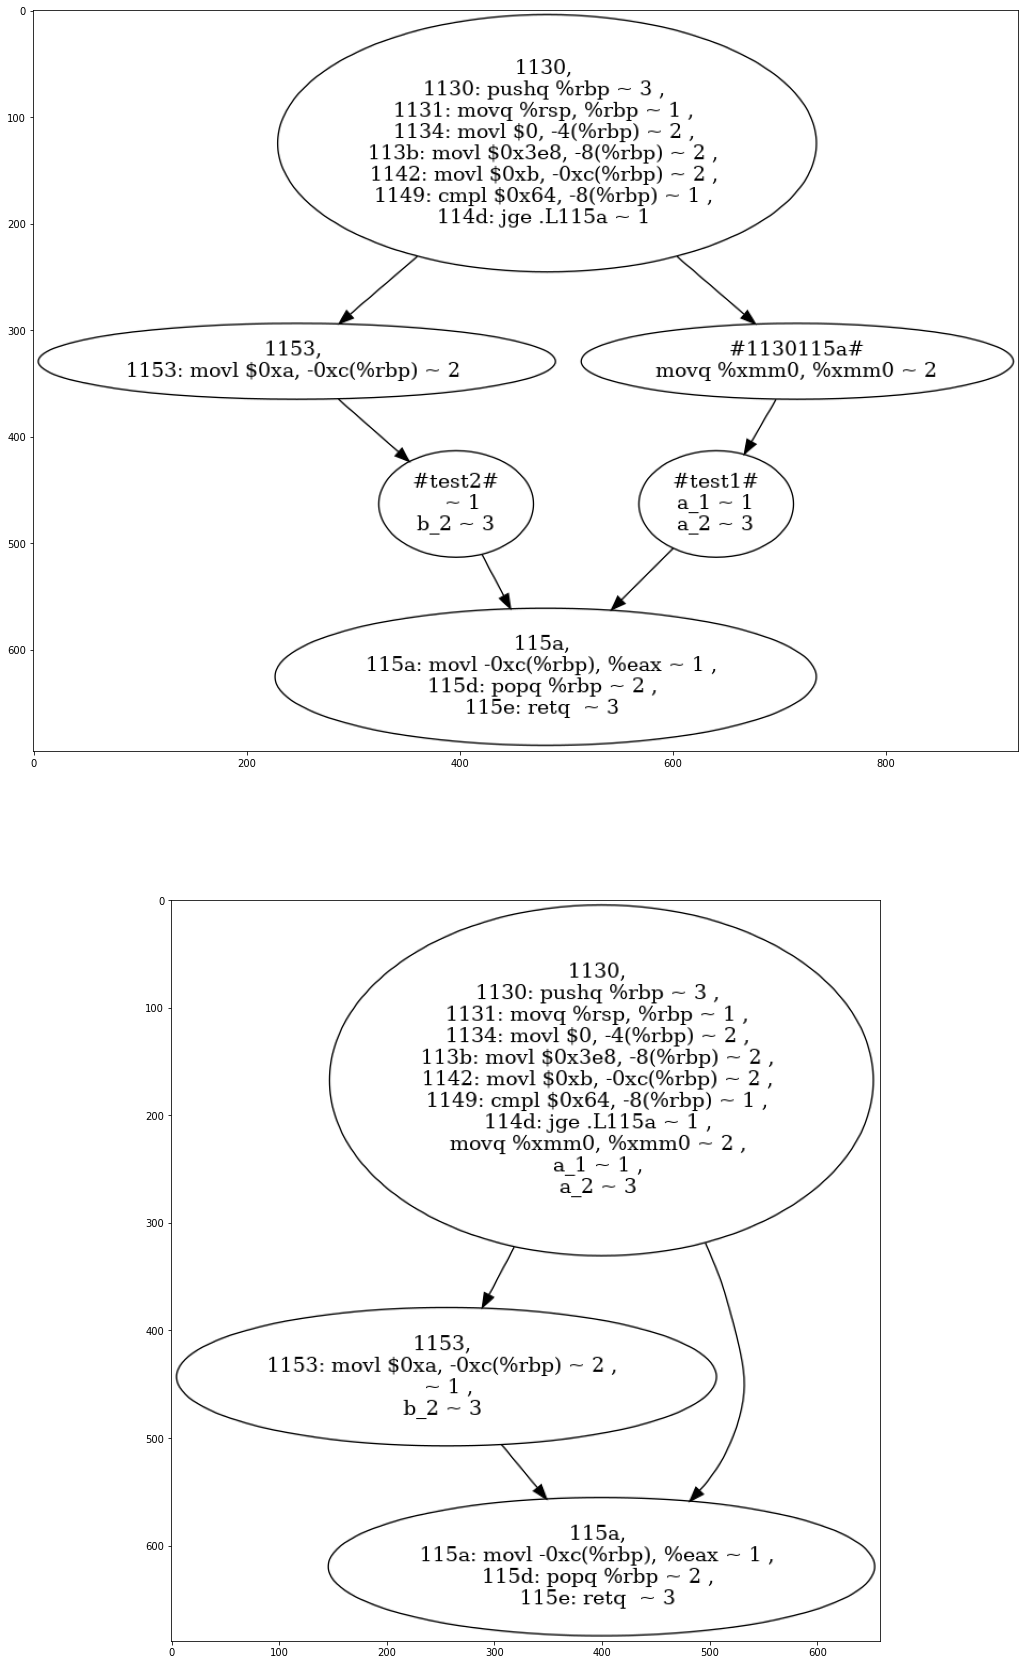

In [15]:
# from rwtools.nemesis.graph.utils import create_graph_structure
from rwtools.nemesis.graph.utils import to_img
from rwtools.nemesis.graph.balance import balance_branching_point


outputfile = "./opt_code/opt_code_test.s"
loader, rw = setup(binary, outputfile)
function_names = loader.container.function_names
nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(2, figsize=(30, 30))

control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)
control_flow_graph.merge_consecutive_nodes()

control_flow_graph.insert_nodes()
target_node = control_flow_graph.get_node('1130')

control_flow_graph.set_stopping_nodes(target_node)
balance_branching_point(control_flow_graph, target_node)

# first test node 
from_node = control_flow_graph.get_node('1130115a')
to_node = control_flow_graph.get_node('115a')

new_node = AbstractNemesisNode([], f"test1")
new_node.insert(0, "a_1", 1)
new_node.insert(1, "a_2",3)

control_flow_graph.insert_between_nodes(new_node, from_node, to_node)

# second test node 
from_node = control_flow_graph.get_node('1153')
to_node = control_flow_graph.get_node('115a')

new_node = AbstractNemesisNode([], f"test2")
new_node.insert(0, " ", 1)
new_node.insert(1, "b_2",3)

control_flow_graph.insert_between_nodes(new_node, from_node, to_node)

axs[0].imshow(to_img(graph))


control_flow_graph.merge_inserted_nodes()

axs[1].imshow(to_img(graph))

    
rw.dump()
    